In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import itertools

In [189]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [190]:
df.drop(['No'],axis=1,inplace=True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [191]:
print(df.shape)
print(df.columns)
print(df.describe())
print(df.info())

(414, 7)
Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
       X1 transaction date  X2 house age  ...  X6 longitude  Y house price of unit area
count           414.000000    414.000000  ...    414.000000                  414.000000
mean           2013.148971     17.712560  ...    121.533361                   37.980193
std               0.281967     11.392485  ...      0.015347                   13.606488
min            2012.667000      0.000000  ...    121.473530                    7.600000
25%            2012.917000      9.025000  ...    121.528085                   27.700000
50%            2013.167000     16.100000  ...    121.538630                   38.450000
75%            2013.417000     28.150000  ...    121.543305                   46.600000
max            2013.583000     43.800000  ...    121.566270

In [192]:
df.isnull().sum()

,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


# **Selecting the values of random state and test size parameters by trying out different combinations of them based on lowest root mean squared error (rmse**)

In [193]:
target = df['Y house price of unit area']
features = df.drop(['Y house price of unit area'],axis=1)

best_rmse = float('inf')
best_random_state = None
best_test_size = None

for randomState in [0,1,42]:
  for testSize in [0.2,0.25,0.3]:
    Xtrain,Xtest,ytrain,ytest = train_test_split(features, target, test_size = testSize, random_state = randomState)
    multiModel = LinearRegression()
    multiModel.fit(Xtrain,ytrain)
    predictions = multiModel.predict(Xtest)
    rmse = round(np.sqrt(mean_squared_error(ytest, predictions)),3)
    print('At Random State:',randomState,'and Test Size:',testSize)
    print('RMSE:', rmse)
    if rmse < best_rmse:
      best_rmse = rmse
      best_random_state = randomState
      best_test_size = testSize

print('Best RMSE:', best_rmse)
print('Best Random State:', best_random_state)
print('Best Test Size:', best_test_size)

At Random State: 0 and Test Size: 0.2
RMSE: 7.715
At Random State: 0 and Test Size: 0.25
RMSE: 8.373
At Random State: 0 and Test Size: 0.3
RMSE: 8.461
At Random State: 1 and Test Size: 0.2
RMSE: 6.709
At Random State: 1 and Test Size: 0.25
RMSE: 7.33
At Random State: 1 and Test Size: 0.3
RMSE: 10.275
At Random State: 42 and Test Size: 0.2
RMSE: 7.315
At Random State: 42 and Test Size: 0.25
RMSE: 8.165
At Random State: 42 and Test Size: 0.3
RMSE: 8.577
Best RMSE: 6.709
Best Random State: 1
Best Test Size: 0.2


# **Selecting the best combination of features by testing our model on every combination of features based on lowest rmse metric.**

In [194]:
numFeatures = features.shape[1]
best_rmse = float('inf')
best_combination = None

for i in range(1, numFeatures + 1):
    for j in itertools.combinations(features.columns, i):
        Xtrain,Xtest,ytrain,ytest = train_test_split(features[list(j)], target, test_size = best_test_size, random_state = best_random_state)
        multiModel = LinearRegression()
        multiModel.fit(Xtrain,ytrain)
        predictions = multiModel.predict(Xtest)
        rmse = round(np.sqrt(mean_squared_error(ytest, predictions)),3)
        print('Features:', j)
        print('RMSE:', rmse)
        if rmse < best_rmse:
            best_rmse = rmse
            best_combination = j

print('Best RMSE:', best_rmse)
print('Best Features:', best_combination)


Features: ('X1 transaction date',)
RMSE: 12.724
Features: ('X2 house age',)
RMSE: 12.496
Features: ('X3 distance to the nearest MRT station',)
RMSE: 8.297
Features: ('X4 number of convenience stores',)
RMSE: 10.066
Features: ('X5 latitude',)
RMSE: 9.173
Features: ('X6 longitude',)
RMSE: 9.599
Features: ('X1 transaction date', 'X2 house age')
RMSE: 12.351
Features: ('X1 transaction date', 'X3 distance to the nearest MRT station')
RMSE: 8.207
Features: ('X1 transaction date', 'X4 number of convenience stores')
RMSE: 9.974
Features: ('X1 transaction date', 'X5 latitude')
RMSE: 9.138
Features: ('X1 transaction date', 'X6 longitude')
RMSE: 9.521
Features: ('X2 house age', 'X3 distance to the nearest MRT station')
RMSE: 7.676
Features: ('X2 house age', 'X4 number of convenience stores')
RMSE: 9.144
Features: ('X2 house age', 'X5 latitude')
RMSE: 8.538
Features: ('X2 house age', 'X6 longitude')
RMSE: 9.074
Features: ('X3 distance to the nearest MRT station', 'X4 number of convenience stores')

In [195]:

Xtrain,Xtest,ytrain,ytest = train_test_split(features[list(best_combination)], target, test_size = best_test_size, random_state = best_random_state)
multiModel = LinearRegression()
multiModel.fit(Xtrain,ytrain)
training_predictions = multiModel.predict(Xtrain)
predictions = multiModel.predict(Xtest)


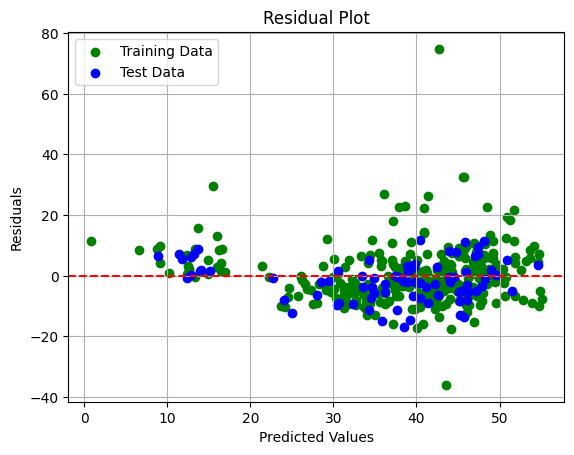

In [196]:
training_residuals = ytrain - training_predictions
residuals = ytest - predictions

plt.scatter(training_predictions, training_residuals,color='green')
plt.scatter(predictions, residuals,color='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [197]:
print('MAE:', round(mean_absolute_error(ytest, predictions),3))
print('MSE:', round(mean_squared_error(ytest, predictions),3))
print('RMSE:', round(np.sqrt(mean_squared_error(ytest, predictions)),3))
print('R2', round(r2_score(ytest, predictions),3))

MAE: 5.332
MSE: 44.43
RMSE: 6.666
R2 0.707


In [198]:
print('Intercept:', round(multiModel.intercept_,3))
print('Coefficients:', multiModel.coef_)

Intercept: -17221.372
Coefficients: [ 5.71121614e+00 -2.47713396e-01 -4.54313748e-03  1.09218572e+00
  2.30963876e+02]


# **Polynomial Regression**
## Finding best degree of polynomial by testing our model iteratively on each degree from 1 to 5.

In [199]:
best_rmse = float('inf')
best_degree = None
results = []

for i in range(1,6):
  poly = PolynomialFeatures(degree=i)
  X_poly = poly.fit_transform(Xtrain)

  poly_regressor = LinearRegression()
  poly_regressor.fit(X_poly, ytrain)

  y_poly = poly_regressor.predict(poly.fit_transform(Xtest))

  mae = round(mean_absolute_error(ytest, y_poly),3)
  mse = round(mean_squared_error(ytest, y_poly),3)
  r2 = round(r2_score(ytest, y_poly),3)
  rmse = round(np.sqrt(mean_squared_error(ytest, y_poly)),3)
  results.append({'Degree': i,'MAE': mae,'MSE': mse,'RMSE': rmse,'R2': r2})

  if rmse < best_rmse:
    best_rmse = rmse
    best_degree = i

results_df = pd.DataFrame(results)
results_df.set_index('Degree', inplace=True)
print(results_df)
print('Best RMSE:', best_rmse)
print('Best Degree:', best_degree)

          MAE     MSE   RMSE     R2
Degree                             
1       5.332  44.430  6.666  0.707
2       4.982  37.666  6.137  0.752
3       5.448  47.926  6.923  0.684
4       5.829  65.795  8.111  0.567
5       6.257  76.415  8.742  0.497
Best RMSE: 6.137
Best Degree: 2


In [200]:
poly = PolynomialFeatures(degree = best_degree) # best degree found out to be 2 as checked in the above cell
X_poly = poly.fit_transform(Xtrain)

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, ytrain)

train_poly = poly_regressor.predict(X_poly)
test_poly = poly_regressor.predict(poly.fit_transform(Xtest))

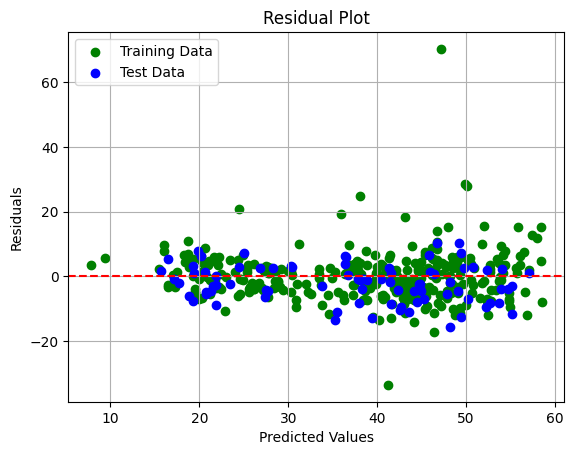

In [201]:
residual_train = ytrain - train_poly
residual_test = ytest - test_poly

plt.scatter(train_poly, residual_train,color='green')
plt.scatter(test_poly, residual_test,color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend(['Training Data', 'Test Data'])
plt.grid(True)
plt.show()

# **Observing the polynomial curves plotted from degrees 1 to 5 for a single particular feature**

Degree 1 - RMSE: 8.297
Degree 2 - RMSE: 7.801
Degree 3 - RMSE: 7.971
Degree 4 - RMSE: 7.836
Degree 5 - RMSE: 8.177


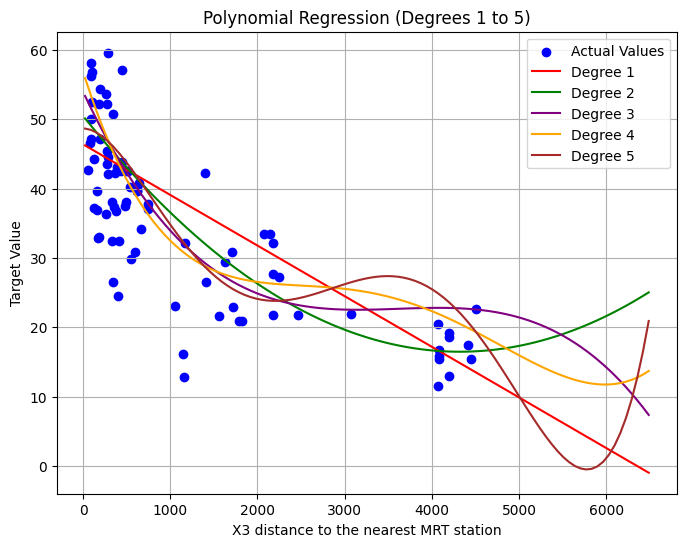

In [202]:

feature = features[['X3 distance to the nearest MRT station']]

X_train, X_test, y_train, y_test = train_test_split(
    feature, target, test_size=best_test_size, random_state=best_random_state
)

X_grid = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')

degrees = [1, 2, 3, 4, 5]
colors = ['red', 'green', 'purple', 'orange', 'brown']

for degree, color in zip(degrees, colors):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    X_poly_grid = poly.fit_transform(X_grid)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred_test = model.predict(X_poly_test)
    y_pred_grid = model.predict(X_poly_grid)

    plt.plot(X_grid, y_pred_grid, color=color, label=f'Degree {degree}')

    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)
    print(f'Degree {degree} - RMSE: {rmse}')

plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("Target Value")
plt.title("Polynomial Regression (Degrees 1 to 5)")
plt.legend()
plt.grid(True)
plt.show()
